In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('logistic.txt',  header = None, names = ['Exam1', 'Exam2', 'Admitted'])
data.insert(0, 'Ones', 1)

cols = data.shape[1]

X = data.iloc[:,:cols-1]
Y = data.iloc[:,cols-1:cols]


X = np.matrix(X)
Y = np.matrix(Y)

X1 = X.copy()

X1 = (X1[:,1:] - X1.mean(axis=0)[:,1:])/X1.std(axis=0)[:,1:]

X[:,1:] = X1

In [2]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [7]:
def cost(theta, X, Y):
    X = np.matrix(X)
    Y = np.matrix(Y)
    theta = np.matrix(theta)
    m = X.shape[0]
    hx = sigmoid(X*(theta.T))
    
    sum1 = -(Y.T)*np.log(hx)
    sum2 = (1-Y).T*np.log(1-hx)
    
    return np.sum((sum1 - sum2))/m

In [8]:
theta = np.matrix([0,0,0])
cost(theta, X, Y)


0.69314718055994518

In [9]:
def gradient_descent(theta, X, Y):
    X = np.matrix(X)
    Y = np.matrix(Y)
    theta = np.matrix(theta)
    m = X.shape[0]
    hx = sigmoid(X*(theta.T))
    
    grad = (np.zeros(theta.ravel().shape[1]))
    
    error = hx - Y
    
    for i in range(X.shape[1]):
        temp = np.multiply(error, X[:,i])
        grad[i] = np.sum(temp)/X.shape[0]
        
    return np.matrix(grad)


In [19]:
""""
cost(theta, X, Y)
for i in range(10000):
    grad = gradient_descent(theta, X, Y)
    theta = theta - 0.005*grad
print(cost(theta, X, Y)), theta


0.224467013742


(None, matrix([[ 1.00387456,  2.49051514,  2.27703316]]))

In [10]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient_descent, args=(X, Y))
theta = np.matrix(result[0])
print(cost(theta, X, Y)), theta

In [11]:
probs = sigmoid(X*(theta.T))
predictions = sigmoid(X*(theta.T))
for i in range(100):
    if predictions[i] >= 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0
        
np.sum(np.fabs(predictions - Y))

11.0

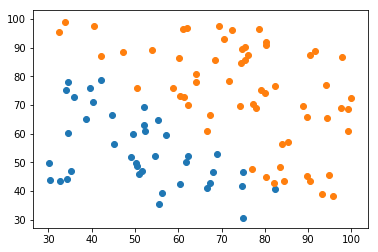

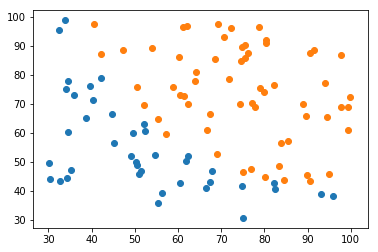

In [8]:
X = data.iloc[:,1:cols-1]
Y = data.iloc[:,cols-1:cols]

X = np.array(X)
Y = np.array(Y)

mask = np.array(predictions == 0).reshape(-1)
x = X[mask]
mask = np.array(predictions == 1).reshape(-1)
y = X[mask]



mask = np.array(Y == 0).reshape(-1)
x1 = X[mask]
mask = np.array(Y == 1).reshape(-1)
y1 = X[mask]


plt.subplot(111)
plt.scatter(x[:,0], x[:,1])
plt.scatter(y[:,0], y[:,1])
plt.show()
plt.subplot(111)
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(y1[:,0], y1[:,1])
plt.show()




In [9]:
def prediction(X,theta):
    probs = sigmoid(X*(theta.T))
    predictions = sigmoid(X*(theta.T))
    for i in range(100):
        if predictions[i] >= 0.5:
            predictions[i] = 1
        else:
            predictions[i] = 0
    
    return predictions


In [21]:
np.sum(np.fabs(predictions - Y))

11.0